# Basic examples of usage of GeoImage, GeoImageTilers

In [ ]:
import os 

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from gimg import GeoImage
from gimgTilers import GeoImageTiler, GeoImageTilerConstSize

In [6]:
def display(img, **kwargs):
    plt.imshow(img, interpolation='none', **kwargs)    

## GeoImage examples

### Open image with GeoImage and print basic information

- Image shape
- geo projection string 
- geographic extent in WGS84
- metadata
- some other functions from gdal dataset

In [4]:
gimg = GeoImage('dog.jpg')

gimg.shape, gimg.projection, gimg.geo_extent, gimg.metadata, gimg.get_dataset().GetDescription(), gimg.get_dataset().GetGeoTransform()

No handlers could be found for logger "GeoImage"


((576, 768, 3),
 '',
 None,
 {'BAND_1__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_2__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'BAND_3__IMAGE_STRUCTURE__COMPRESSION': 'JPEG',
  'COLOR_PROFILE__SOURCE_ICC_PROFILE': 'AAAMSExpbm8CEAAAbW50clJHQiBYWVogB84AAgAJAAYAMQAAYWNzcE1TRlQAAAAASUVDIHNSR0IAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1IUCAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARY3BydAAAAVAAAAAzZGVzYwAAAYQAAABsd3RwdAAAAfAAAAAUYmtwdAAAAgQAAAAUclhZWgAAAhgAAAAUZ1hZWgAAAiwAAAAUYlhZWgAAAkAAAAAUZG1uZAAAAlQAAABwZG1kZAAAAsQAAACIdnVlZAAAA0wAAACGdmlldwAAA9QAAAAkbHVtaQAAA/gAAAAUbWVhcwAABAwAAAAkdGVjaAAABDAAAAAMclRSQwAABDwAAAgMZ1RSQwAABDwAAAgMYlRSQwAABDwAAAgMdGV4dAAAAABDb3B5cmlnaHQgKGMpIDE5OTggSGV3bGV0dC1QYWNrYXJkIENvbXBhbnkAAGRlc2MAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAAC

### Get image data
- Whole image
- Part of the image without rescaling
- Part of the image with rescaling

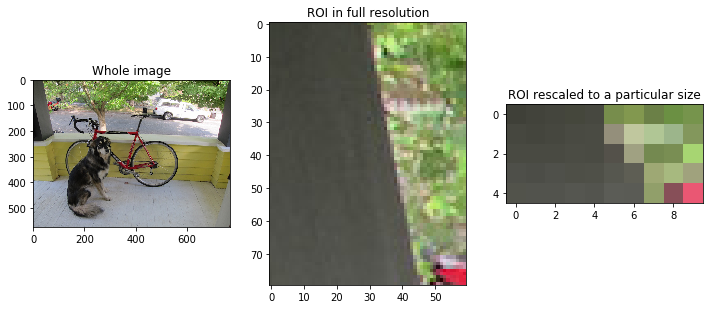

In [9]:
np_img = gimg.get_data(dtype=np.uint8)
np_img.dtype, np_img.shape
plt.figure(figsize=(12,6))
plt.subplot(131)
display(np_img)
plt.title("Whole image")
plt.subplot(132)
display(gimg.get_data([10, 15, 60, 80], dtype=np.uint8))
plt.title("ROI in full resolution")
plt.subplot(133)
display(gimg.get_data([10, 15, 60, 80], dst_width=10, dst_height=5, dtype=np.uint8))
plt.title("ROI rescaled to a particular size")

## GeoImageTilers examples

### GeoImageTiler : iterator over tiles of GeoImage. 

**Tiling is done specifing extent in pixels**

* Add `nodata` values, constant tile size and overlapping

Display tiles of size: (256, 256) with overlapping: 15


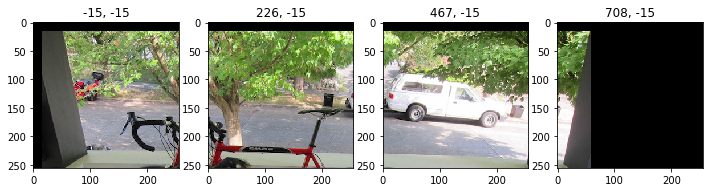

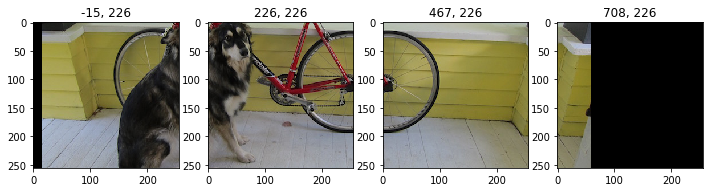

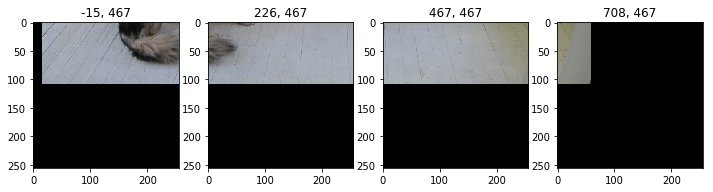

In [12]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=True, nodata_value=0)

counter = 0
print("Display tiles of size: {} with overlapping: {}".format(tiles.tile_size, tiles.overlapping))
for tile, xoffset, yoffset in tiles:    
    if counter % 4 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 4 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1
    

* Without `nodata` values, variable tile size at bounadries and overlapping

Display tiles of size: (256, 256) with overlapping: 15 without `nodata`


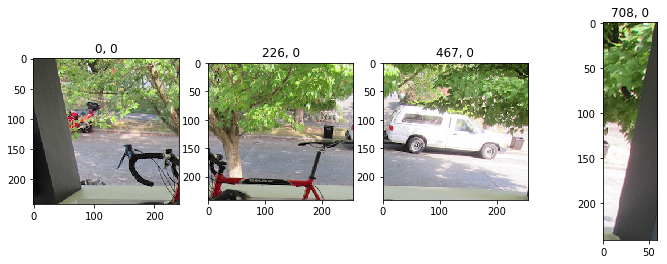

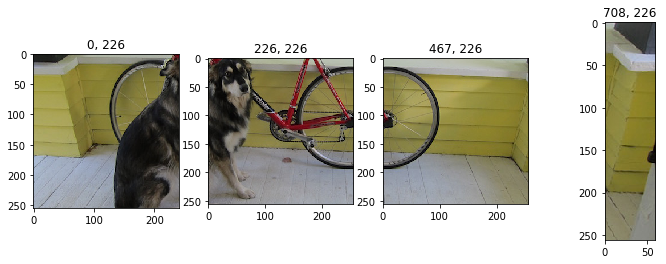

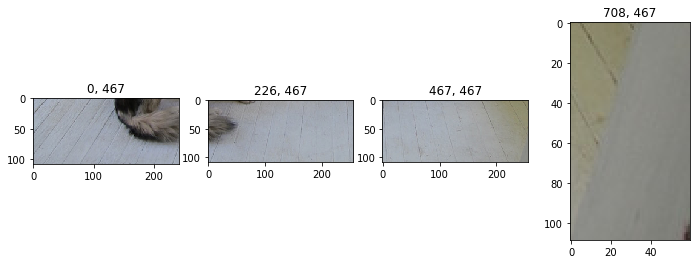

In [16]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=15, include_nodata=False, nodata_value=-1.0)
counter = 0
print("Display tiles of size: {} with overlapping: {} without `nodata`".format(tiles.tile_size, tiles.overlapping))
for tile, xoffset, yoffset in tiles:    
    if counter % 4 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 4 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1

* It is possible to specify a scale of input image. Tile size defines output image size, however input image extent written in the tile is scale times larger.

Display tiles of size: (256, 256) with overlapping: 0 and scale: 2 and without `nodata` 


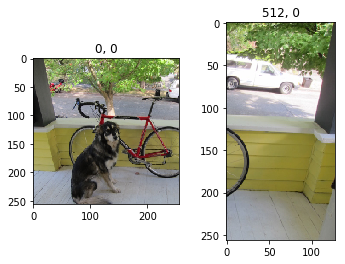

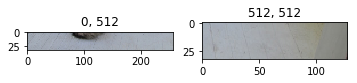

In [15]:
tiles = GeoImageTiler(gimg, tile_size=(256, 256), overlapping=0, include_nodata=False, scale=2, nodata_value=0.0)
counter = 0
print("Display tiles of size: {} with overlapping: {} and scale: {} and without `nodata` ".format(tiles.tile_size, tiles.overlapping, tiles.scale))
for tile, xoffset, yoffset in tiles:    
    if counter % 2 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 2 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1

* Constant size tiles iterator with a variable overlapping between tiles

Display tiles of size: (256, 256)


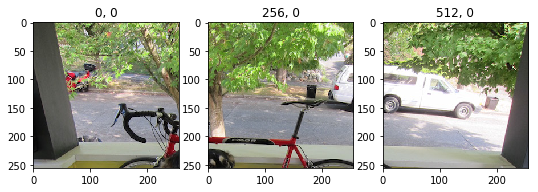

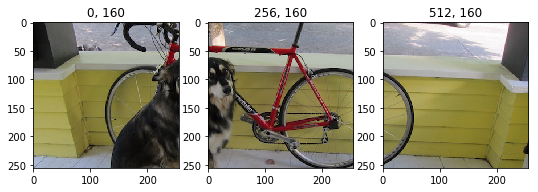

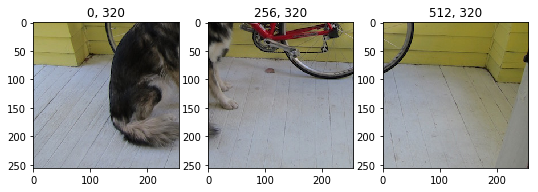

In [19]:
tiles = GeoImageTilerConstSize(gimg, tile_size=(256, 256), min_overlapping=0)
counter = 0
print("Display tiles of size: {}".format(tiles.tile_size))
for tile, xoffset, yoffset in tiles:    
    if counter % 3 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 3 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1

* Constant size tiles iterator with a variable overlapping between tiles larger than `min_overlapping`

Display tiles of size: (256, 256) and minimum overlapping: 45


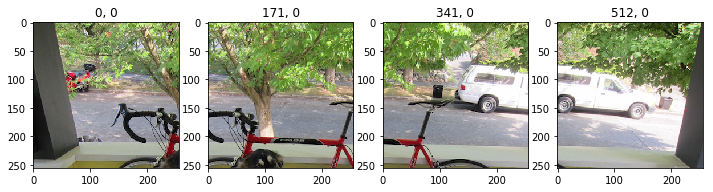

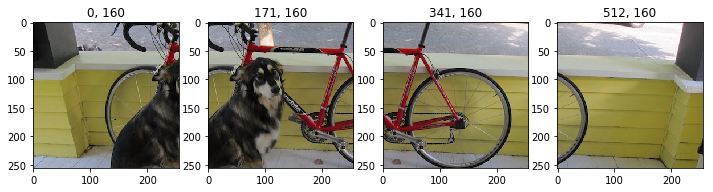

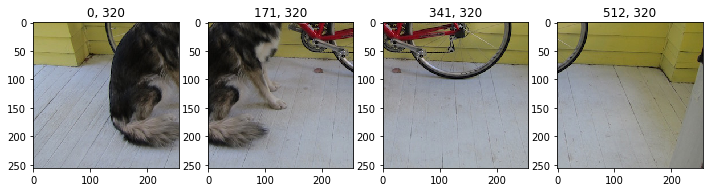

In [22]:
tiles = GeoImageTilerConstSize(gimg, tile_size=(256, 256), min_overlapping=45)
counter = 0
print("Display tiles of size: {} and minimum overlapping: {}".format(tiles.tile_size, tiles.min_overlapping))
for tile, xoffset, yoffset in tiles:    
    if counter % 4 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 4 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1

* Constant size tiles iterator with a variable overlapping between tiles and with a scale

Display tiles of size: (256, 256) and scale: 2


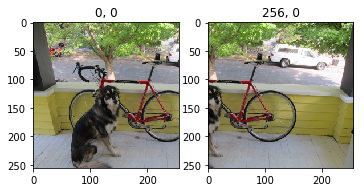

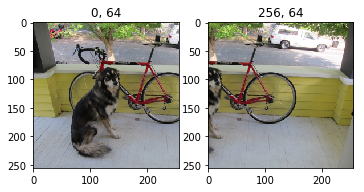

In [21]:
tiles = GeoImageTilerConstSize(gimg, tile_size=(256, 256), min_overlapping=0, scale=2)
counter = 0
print("Display tiles of size: {} and scale: {}".format(tiles.tile_size, tiles.scale))
for tile, xoffset, yoffset in tiles:    
    if counter % 2 == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1,4,counter % 2 + 1)
    plt.title("%i, %i" % (xoffset, yoffset))
    display(tile.astype(np.uint8))
    counter += 1